In [4]:
import numpy as np
import utils as u
import plot_utils as pu
from matplotlib import rcParams 
from matplotlib import pyplot as plt
import statsmodels.api as sm #for GLM
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import cross_validate, KFold, cross_val_predict, cross_val_score 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, SCORERS, make_scorer
from sklearn.decomposition import PCA 

%load_ext autoreload

%autoreload 2

In [2]:
alldat = u.load_data()
num_sessions = len(alldat)

In [7]:
accuracies = {}
coefs = {}
for i_session in range(num_sessions):
	# dat['brain_region'] = u.brain_areas(dat)
    areas = np.unique(alldat[i_session]['brain_area'])[:-1]
    for area in areas:
        print(f'in session {i_session} training model on area {area}')
        accuracies[f'session {i_session} {area} D'], coefs[f'session {i_session} {area} D'] = u.chosen_direction(alldat, i_session, 1 , areas,'P','D')
        accuracies[f'session {i_session} {area} M'], coefs[f'session {i_session} {area} M'] = u.chosen_direction(alldat, i_session, 1 , areas,'P','M')

mponent: 6  Variance explained: 0.2426458556248526
N component: 10  Variance explained: 0.32677250034257793
N component: 14  Variance explained: 0.38772013766582275
N component: 18  Variance explained: 0.43702877033237897
N component: 22  Variance explained: 0.4791060717800107
N component: 26  Variance explained: 0.5177089346107699
N component: 30  Variance explained: 0.5525379514672971
N component: 34  Variance explained: 0.5832822798575934
N component: 38  Variance explained: 0.6102292524999074
N component: 42  Variance explained: 0.6368365133425661
N component: 46  Variance explained: 0.6621171355629446
N component: 50  Variance explained: 0.6858675183798766
N component: 54  Variance explained: 0.707675192289558
N component: 58  Variance explained: 0.7284679545227324
N component: 62  Variance explained: 0.7472590065758288
N component: 66  Variance explained: 0.7652694505904883
N component: 70  Variance explained: 0.7812005027296841
N component: 74  Variance explained: 0.796302206073

In [32]:
for i in range(len(alldat)):
    session_acc = []
    for area in areas:
        area_acc = [accuracies[key] for key in accuracies if (str(session) in key) and ('M' in key)]
        avg_acc = np.mean(area_acc)
        # max_acc = np.max(area_acc)
        print(f'mean accuracy for area {area} in session {session} is {avg_acc}')
        print(f'maximum accuracy for area {area} in session {session} is {max_acc}')


ion 5 is 0.656456313429731
maximum accuracy for area CA1 in session 5 is 0.8554597701149426
mean accuracy for area DG in session 5 is 0.656456313429731
maximum accuracy for area DG in session 5 is 0.8554597701149426
mean accuracy for area ILA in session 5 is 0.656456313429731
maximum accuracy for area ILA in session 5 is 0.8554597701149426
mean accuracy for area LP in session 5 is 0.656456313429731
maximum accuracy for area LP in session 5 is 0.8554597701149426
mean accuracy for area MOs in session 5 is 0.656456313429731
maximum accuracy for area MOs in session 5 is 0.8554597701149426
mean accuracy for area PL in session 5 is 0.656456313429731
maximum accuracy for area PL in session 5 is 0.8554597701149426
mean accuracy for area SUB in session 5 is 0.656456313429731
maximum accuracy for area SUB in session 5 is 0.8554597701149426
mean accuracy for area VISam in session 5 is 0.656456313429731
maximum accuracy for area VISam in session 5 is 0.8554597701149426
mean accuracy for area VISp 

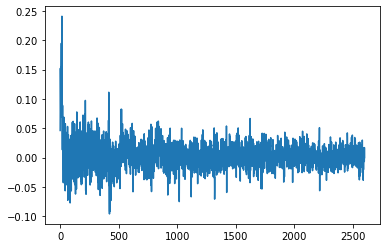

In [24]:
plt.plot([coefs[key] for key in accuracies if areas[2] in key][1][0,:])



In [79]:
np.

[array([0.79310345, 0.82758621, 0.79310345, 0.78571429]),
 array([0.79310345, 0.82758621, 0.79310345, 0.78571429]),
 array([0.79310345, 0.82758621, 0.79310345, 0.78571429]),
 array([0.79310345, 0.82758621, 0.79310345, 0.78571429]),
 array([0.62068966, 0.82758621, 0.68965517, 0.67857143]),
 array([0.79310345, 0.82758621, 0.79310345, 0.78571429]),
 array([0.79310345, 0.82758621, 0.79310345, 0.78571429]),
 array([0.79310345, 0.82758621, 0.79310345, 0.78571429]),
 array([0.51428571, 0.42857143, 0.54285714, 0.32352941]),
 array([0.51428571, 0.45714286, 0.57142857, 0.32352941]),
 array([0.51428571, 0.4       , 0.57142857, 0.32352941]),
 array([0.51428571, 0.42857143, 0.54285714, 0.32352941]),
 array([0.39393939, 0.45454545, 0.4375    , 0.4375    ]),
 array([0.39393939, 0.45454545, 0.4375    , 0.4375    ]),
 array([0.39393939, 0.45454545, 0.4375    , 0.4375    ]),
 array([0.42424242, 0.39393939, 0.5       , 0.34375   ]),
 array([0.39393939, 0.45454545, 0.4375    , 0.4375    ]),
 array([0.4242

In [42]:
np.save('coefs.npy', coefs) 


In [88]:
check_ = np.load('accuracies.npy',allow_pickle='TRUE').item()

In [91]:
[check_[key] for key in accuracies if "0" in key]

[array([0.62068966, 0.82758621, 0.68965517, 0.67857143]),
 array([0.79310345, 0.82758621, 0.79310345, 0.78571429]),
 array([0.5862069 , 0.82758621, 0.68965517, 0.67857143]),
 array([0.79310345, 0.82758621, 0.79310345, 0.78571429]),
 array([0.62068966, 0.82758621, 0.68965517, 0.67857143]),
 array([0.79310345, 0.82758621, 0.79310345, 0.78571429]),
 array([0.62068966, 0.82758621, 0.68965517, 0.67857143]),
 array([0.79310345, 0.82758621, 0.79310345, 0.78571429]),
 array([0.62068966, 0.82758621, 0.68965517, 0.67857143]),
 array([0.79310345, 0.82758621, 0.79310345, 0.78571429]),
 array([0.62068966, 0.82758621, 0.68965517, 0.67857143]),
 array([0.79310345, 0.82758621, 0.79310345, 0.78571429]),
 array([0.62068966, 0.79310345, 0.72413793, 0.67857143]),
 array([0.79310345, 0.82758621, 0.79310345, 0.78571429]),
 array([0.92727273, 0.92727273, 0.85185185, 0.90740741]),
 array([0.63636364, 0.65454545, 0.64814815, 0.66666667]),
 array([0.92727273, 0.92727273, 0.85185185, 0.90740741]),
 array([0.6363

In [35]:
areas

array(['ACA', 'CA1', 'DG', 'ILA', 'LP', 'MOs', 'PL', 'SUB', 'VISam',
       'VISp'], dtype='<U5')

In [63]:
best = {}
for i_session in range(20): #all_sessions:
    bareas = np.unique(alldat[i_session]['brain_area'][:-1])
    session_move_acc = []
    session_dir_acc = []
    for area in bareas:
        if area != 'root':
            area_move_acc = np.mean(accuracies[f'session {i_session} {area} M'])
            session_move_acc.append(area_move_acc)
            area_dir_acc = np.mean(accuracies[f'session {i_session} {area} D'])
            session_dir_acc.append(area_dir_acc)
            print(f'acurracy in session {i_session} in {area} was {area_dir_acc}')
    best_mov_pred_area = areas[np.argmax(area_move_acc)]
    best_dir_pred_area = areas[np.argmax(area_dir_acc)]
    # best[f'{i_session} {best_mov_pred_area}'] = np.max(area_move_acc)
    best[f'{i_session} {best_dir_pred_area}'] = np.max(session_dir_acc)

acurracy in session 0 in ACA was 0.7041256157635469
acurracy in session 0 in CA3 was 0.7041256157635469
acurracy in session 0 in DG was 0.6955049261083743
acurracy in session 0 in LS was 0.7127463054187193
acurracy in session 0 in MOs was 0.7041256157635469
acurracy in session 0 in SUB was 0.7041256157635469
acurracy in session 0 in VISp was 0.7041256157635469
acurracy in session 1 in CA1 was 0.6756302521008404
acurracy in session 1 in POST was 0.6684873949579831
acurracy in session 1 in VISl was 0.6756302521008404
acurracy in session 1 in VISpm was 0.6758403361344537
acurracy in session 2 in CA1 was 0.41548295454545453
acurracy in session 2 in DG was 0.41548295454545453
acurracy in session 2 in LP was 0.41548295454545453
acurracy in session 2 in MG was 0.41548295454545453
acurracy in session 2 in MRN was 0.41548295454545453
acurracy in session 2 in NB was 0.41548295454545453
acurracy in session 2 in POST was 0.41548295454545453
acurracy in session 2 in SPF was 0.41548295454545453
acur

KeyError: 'session 3 VPL M'

In [51]:
list(accuracies.keys())[:8]

['session 0 ACA D',
 'session 0 ACA M',
 'session 0 CA3 D',
 'session 0 CA3 M',
 'session 0 DG D',
 'session 0 DG M',
 'session 0 LS D',
 'session 0 LS M']

In [56]:
accuracies['session 0 LS M']

0.7998768472906403